# Cancer Data Classifier

## Project Description
<b>Prostate, Lung, Colorectal, and Ovarian Cancer Screening Trial (PLCO)</b>                                                      
The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

      

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time

## Data Preprocessing

### Importing the Dataset

In [3]:
dataset = pd.read_csv('cancer.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(dataset)

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,...,0.065494,0.030681,0.039686,0.037256,0.022888,0.056221,0.055819,0.010087,0.006004,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.019997,0.002927,0.006809,-0.003585,0.026362,0.026540,0.026112,0.026230,0.021676,0.024205,...,0.018509,0.013225,0.015765,0.018762,0.012212,0.009340,0.020955,0.010685,0.013423,N
211,0.042346,0.031884,0.049617,0.031419,0.042043,0.033383,0.054695,0.079029,0.063147,0.040817,...,0.019066,0.038845,0.035201,0.013012,0.032180,0.026465,0.017850,0.036014,0.018276,N
212,0.023558,0.021331,0.016210,0.012324,0.022074,0.029829,0.032624,0.022100,0.028950,0.037769,...,0.031909,0.019024,0.024298,0.032061,0.009901,0.011709,0.008274,0.004742,0.024756,N
213,0.028351,0.023266,0.004556,0.024095,0.018943,0.025935,0.019066,0.037213,0.041892,0.031092,...,0.012613,0.031370,0.030285,0.034522,0.024089,0.006737,0.010033,0.017391,0.031537,N


## Encoding the Output Data
Here, we replace Oak, Pine, and Cherry with Labels 0,1, and 2

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

## PCA

In [7]:
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=215) # we choose the number of PCs
PrinCom.fit(X)
Z=PrinCom.transform(X)

Printing PCA 1 and PCA 2

In [8]:
pd.DataFrame(Z[:,0])

,0
0,9.266716
1,19.951634
2,12.567389
3,29.648523
4,22.292448
...,...
210,-9.338252
211,-2.877761
212,-0.558225
213,-3.872329


In [9]:
pd.DataFrame(Z[:,1])

,0
0,0.301441
1,-0.488083
2,-0.776993
3,9.235694
4,9.280580
...,...
210,-4.617750
211,-1.046578
212,-5.645364
213,-6.608233


Visualizing the data after transformation. Plotting PCA1 and PCA2

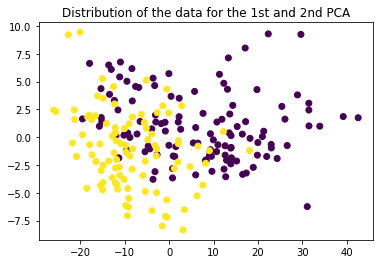

In [10]:
plt.scatter(Z[:,0],Z[:,1],c=Y) 
plt.title("Distribution of the data for the 1st and 2nd PCA")
plt.show()

## Checking the contribution of PCs

In [11]:
e = []
for z in Z.T:
  e.append(np.var(z))

Checking if EigenValues are in the order of Large to Small

In [12]:
pd.DataFrame(e)

,0
0,1.954671e+02
1,1.160985e+01
2,8.937376e+00
3,6.206673e+00
4,4.054889e+00
...,...
210,3.289014e-03
211,3.242773e-03
212,2.947184e-03
213,2.452537e-03


In [13]:
contributions = []
for i in range(Z.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

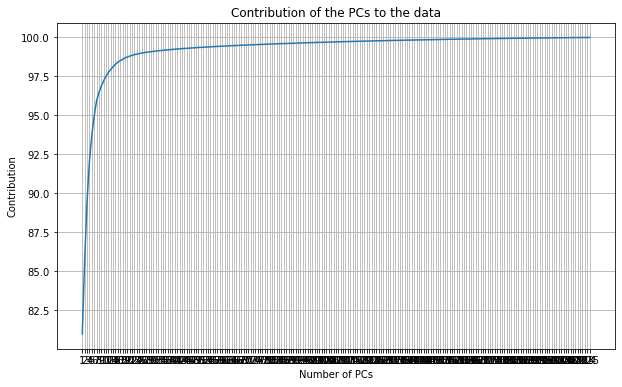

In [14]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1, 216)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,216)))
plt.show()

Contribution from 10 PCA 

In [17]:
contribution=(e[0]+e[1]+e[2]+e[3]+e[4]+e[5]+e[6]+e[7]+e[8]+e[9])/(np.sum(e))
contribution

0.9721612152100318

# ANN model

The first 10 PCs are taken as input to the model

In [18]:
inputs= Z[:, 0:10]

Splitting the data to the trainingset and testse

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, Y, test_size = 0.2, random_state = 0)

Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building the model

In [21]:
GlueModel=tf.keras.models.Sequential()
GlueModel.add(tf.keras.layers.Dense(10,activation='relu'))
GlueModel.add(tf.keras.layers.Dense(20,activation='relu'))
GlueModel.add(tf.keras.layers.Dense(2,activation='softmax'))
GlueModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
GlueModel.fit(X_train, Y_train, batch_size = 8, epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 0.6852 - accuracy: 0.5291
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6438 - accuracy: 0.6512
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6086 - accuracy: 0.7093
Epoch 4/100
22/22 [==============================] - 0s 947us/step - loss: 0.5791 - accuracy: 0.7151
Epoch 5/100
22/22 [==============================] - 0s 902us/step - loss: 0.5457 - accuracy: 0.7267
Epoch 6/100
22/22 [==============================] - 0s 904us/step - loss: 0.5119 - accuracy: 0.7558
Epoch 7/100
22/22 [==============================] - 0s 902us/step - loss: 0.4756 - accuracy: 0.7849
Epoch 8/100
22/22 [==============================] - 0s 950us/step - loss: 0.4394 - accuracy: 0.8140
Epoch 9/100
22/22 [==============================] - 0s 950us/step - loss: 0.4018 - accuracy: 0.8488
Epoch 10/100
22/22 [==============================] - 0s 855us/step - loss: 0.3643 - accuracy: 0.

Evaluating the model over the test set

In [22]:
GlueModel.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.9302


[0.35079020261764526, 0.930232584476471]

Comment : 
1. First 10PCA cotributed to 97% of data. Using these 10PCA. Using the ANN classifier by taking first 10 PCA as input gave a model accuracy of 93% which is really good. 
2.  PCA performs a linear transformation and PCA can be used to remove dimensions that have strong correlations before PCA transformation. However not every ttime PCA is a good option as logistic regression may be better for some cases. 
3. For the cancer model, since we have so many variables we cannot say which variable affects accuracy, using PCA in tandem with ML models will give better results.